## 데이터 탐색

In [ ]:
# # matplotlib 한글깨짐해결
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

#### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Section 1/project/vgames2.csv"

In [3]:
df_ori = pd.read_csv(data_path)

df_ori.drop(['Unnamed: 0'], axis = 1, inplace = True)

#### 데이터 살펴보기

In [4]:
# 10개의 샘플 랜덤으로 불러오기
df_ori.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14258,BioShock,PS3,2008.0,Shooter,Take-Two Interactive,0.75,0.49,0.01,0.21
16025,Fate/hollow ataraxia,PSV,2014.0,Adventure,Type-Moon,0,0,0.1,0
1284,Lunar 2: Eternal Blue Complete,PS,1999.0,Role-Playing,Kadokawa Shoten,0.19,0.13,0,0.02
10243,Derby Tsuku 5: Derby Uma o Tsukurou!,PS2,2006.0,Sports,Sega,0,0,0.04,0
4066,Cold Fear,XB,2005.0,Action,Ubisoft,0.05,0.01,0,0
13532,"Ed, Edd n Eddy: The Mis-Edventures",GBA,2005.0,Platform,Midway Games,0.08,0.03,0,0
13746,The Biggest Loser,Wii,2009.0,Sports,THQ,0.87,0.12,0,0.09
16375,Sound Novel Machi,SAT,1998.0,Adventure,ChunSoft,0,0,0.09,0
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
12266,Call of Duty: Black Ops 3,X360,2015.0,Shooter,Activision,1.11,0.48,0,0.16


- **sales**
  - 단위가 서로 다름(단위가 없는 경우, k, M이 붙어있는 경우) -> 통일 필요
  - 0인 값이 생각보다 많음 -> 어떻게 처리?
- **Name**
  - 게임 이름 중 중복된 값이 있는지 확인
  - 이름과 플랫폼이 동시에 중복되는 경우 삭제
- **Year**
  - float형으로 구성 -> int형으로 변환
- **Platform**
  - 고유한 값들을 출력해보고 실제 존재하는 플랫폼인지 확인하는 과정 필요?

In [5]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


- **결측치**
  - Year, Genre, Publisher 항목에 결측치 존재
- **Sales**
  - 단위 통일 후, float형으로 변환
- **Year**
  - .0 모두 제거
  - object 형태로 변환

In [6]:
# 이름에 연도가 포함되있는 경우
test_df = df_ori[df_ori.Name.str.contains(r'\d\d\d\d')]
test_df[test_df.Year.isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1572,Tomb Raider (2013),PC,NaN,Action,Square Enix,0.06,0.25,0,0.05
2492,Madden NFL 2002,XB,NaN,Sports,Unknown,0.53,0.02,0,0.03
3238,Football Manager 2007,X360,NaN,Sports,Sega,0,0.01,0,0
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0,0.41
4230,Sega Rally 2006,PS2,NaN,Racing,Unknown,0,0,0.04,0
6949,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71
10637,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0,0,0
10896,All-Star Baseball 2005,PS2,NaN,Sports,Unknown,0.16,0.12,0,0.04
10965,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51
11386,NFL GameDay 2003,PS2,NaN,Sports,Unknown,0.2,0.15,0,0.05


In [7]:
# 장르에 결측치가 있는 경우
df_ori[df_ori.Genre.isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [8]:
# 이름이 중복되면서 장르에 결측치가 존재하는 경우
df_ori[(df_ori.Name.duplicated(keep=False)) & (df_ori.Genre.isna())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0
3932,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.1,0.06,0,0.18
4148,Grand Theft Auto IV,PC,2008.0,NaN,Take-Two Interactive,0.01,0.79,0,0.08
4545,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,NaN,Namco Bandai Games,0.39,0.1,0.01,0.04
5713,Back to the Future: The Game,XOne,2015.0,NaN,Telltale Games,0,0.02,0,0
7336,Madden NFL 11,PS2,2010.0,NaN,Electronic Arts,0.41,0.02,0,0.07
10432,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,NaN,Vivendi Games,0.08,0,0,0.01


In [9]:
# publisher가 unknown인 경우
df_ori[df_ori.Publisher=='Unknown']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
30,Kids Learn Music A+ Edition,DS,2011.0,Misc,Unknown,0.05,0,0,0
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
212,Wild West Shootout,Wii,2010.0,Shooter,Unknown,0.01,0.01,0,0
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
387,Gummy Bears Mini Golf,Wii,2010.0,Sports,Unknown,0.04,0,0,0
...,...,...,...,...,...,...,...,...,...
16400,Afrika,PS3,2008.0,Adventure,Unknown,0.12,0,0.08,0.01
16402,The Golf Club,XOne,2014.0,Sports,Unknown,0.02,0,0,0
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [10]:
# 이름이 중복되어있으면서 publisher가 결측치인 경우
df_ori[(df_ori.Name.duplicated(keep=False)) & (df_ori.Publisher.isna())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
6392,Brothers in Arms: Furious 4,X360,NaN,Shooter,NaN,0.01,0,0,0
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0
9877,Mario Tennis,3DS,NaN,Sports,NaN,0,0,0.02,0
11641,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0,0,0.01,0
16067,Bound By Flame,X360,2014.0,Role-Playing,NaN,0,0.01,0,0


In [11]:
df_ori[(df_ori.Name.duplicated(keep=False)) & (df_ori.Publisher == 'Unknown')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
387,Gummy Bears Mini Golf,Wii,2010.0,Sports,Unknown,0.04,0,0,0
621,Blitz: The League,PS2,2005.0,Sports,Unknown,0.74,0.03,0,0.12
808,Major League Baseball 2K6,PSP,NaN,Sports,Unknown,0.11,0,0,0.01
1285,Mega Man X Collection,PS2,NaN,Misc,Unknown,0.12,0.09,0,0.03
...,...,...,...,...,...,...,...,...,...
16195,Singularity,X360,NaN,Shooter,Unknown,0.24,0.05,0,0.02
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16402,The Golf Club,XOne,2014.0,Sports,Unknown,0.02,0,0,0


In [12]:
# 이름에 __salse가 포함되어 있는 경우
df_ori[df_ori.Name.str.contains(r'sales')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
159,International Superstar Soccer 2000 (JP weekly...,N64,1999.0,Sports,Konami Digital Entertainment,0,0,0.18,0
244,"Lunar 2: Eternal Blue(sales, but wrong system)",GEN,1994.0,Role-Playing,Game Arts,0,0,0.14,0
397,Wild ARMs 5 (jp sales),PS2,2006.0,Role-Playing,505 Games,0,0,0.12,0
584,Imagine: Figure Skater (US sales),DS,2007.0,Sports,Ubisoft,0.46,0.01,0M,0
...,...,...,...,...,...,...,...,...,...
16102,Chou-Kuukan Night Pro Yakyuu King(higher JP sa...,N64,1996.0,Sports,Imagineer,0,0,0.22,0
16239,Magical Starsign (US sales),DS,2006.0,Role-Playing,Nintendo,0.16,0.03,0,0
16417,TouchMaster 3(Others sales),DS,2009.0,Puzzle,Warner Bros. Interactive Entertainment,0,0.24,0,0.02
16510,Fatal Fury: Battle Archives Volume 1 (JP sales),PS2,2006.0,Fighting,Ignition Entertainment,0,0,0.01,0


In [13]:
# 이름이 중복된 것
df_ori.Name.duplicated().sum()

5105

In [14]:
df_ori[(df_ori.Name.duplicated()) & (df_ori.Year.duplicated())] # 이름과 연도가 중복되는 경우

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
131,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0,1.12,0,0.03
230,IL-2 Sturmovik: Birds of Prey,DS,2009.0,Simulation,505 Games,0.06,0,0,0
250,NASCAR Unleashed,3DS,2011.0,Racing,Activision,0.18,0,0,0.01
279,The Incredibles: Rise of the Underminer,XB,2005.0,Action,THQ,0.06,0.02,0,0
343,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16
...,...,...,...,...,...,...,...,...,...
16591,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [15]:
df_ori[(df_ori.Name.duplicated()) & (df_ori.Year.isna())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2142,Madden NFL 06,X360,NaN,Sports,Electronic Arts,0.54,0,0.01,0.03
2492,Madden NFL 2002,XB,NaN,Sports,Unknown,0.53,0.02,0,0.03
2552,The Golden Compass,PSP,NaN,Action,Sega,0.11,160K,0,0.1
3182,Danganronpa: Trigger Happy Havoc,PSP,NaN,Misc,Unknown,0,0,0.24,0
...,...,...,...,...,...,...,...,...,...
16195,Singularity,X360,NaN,Shooter,Unknown,0.24,0.05,0,0.02
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K


- **Year**
  - 결측치가 있으면서 이름이 중복되는 경우, 연도를 채움
  - 결측치가 있으면서 게임이름에 연도가 들어있는 경우 해당 연도로 결측치 채움
- **Genre**
  - 결측치가 있는 값 중 이름이 중복된 값이 있다면 그 데이터의 장르로 채움
- **Publisher**
  - 결측치가 있는 값 중 이름이 중복된 값이 있다면 그 데이터의 값으로 채움
  - NAN값과 더불어 Unknown 값도 존재함 -> 따라서 NAN값을 Unknown으로 채워줘도 상관없지 않을까...
- **Name**
  -  이름에 __sales를 포함하는 경우, 특정 나라에 대한 판매량만을 수집했다고 보고 삭제?

## 데이터 전처리

#### 단위 통일
기본적으로 단위가 붙어있지 않은 항목들의 단위를 [M]으로 보고, M이 붙어있는 경우 단순 제거, k가 붙어있는 경우 1000으로 나눠서 단위 통일

In [16]:
df = df_ori.copy()

In [17]:
print(df.NA_Sales.str.contains("M").sum(), df.EU_Sales.str.contains("M").sum(), df.JP_Sales.str.contains("M").sum(), df.Other_Sales.str.contains("M").sum())

100 100 99 100


In [18]:
print(df.NA_Sales.str.contains("K").sum(), df.EU_Sales.str.contains("K").sum(), df.JP_Sales.str.contains("K").sum(), df.Other_Sales.str.contains("K").sum())

100 100 100 100


In [19]:
# K가 포함된 열의 인덱스 가져오기
NA_index = df[df.NA_Sales.str.contains("K")].index
EU_index = df[df.EU_Sales.str.contains("K")].index
JP_index = df[df.JP_Sales.str.contains("K")].index
Other_index = df[df.Other_Sales.str.contains("K")].index

In [20]:
# K, M 제거
df = df.replace(regex={"NA_Sales":{"K":"", "M":""},
            "EU_Sales":{"K":"", "M":""},
            "JP_Sales":{"K":"", "M":""},
            "Other_Sales":{"K":"", "M":""}})

In [21]:
print(df.NA_Sales.str.contains("M").sum(), df.EU_Sales.str.contains("M").sum(), df.JP_Sales.str.contains("M").sum(), df.Other_Sales.str.contains("M").sum())

0 0 0 0


In [22]:
print(df.NA_Sales.str.contains("K").sum(), df.EU_Sales.str.contains("K").sum(), df.JP_Sales.str.contains("K").sum(), df.Other_Sales.str.contains("K").sum())

0 0 0 0


In [23]:
# 단위 K -> 단위 M으로 통일
df.loc[NA_index, 'NA_Sales'] = round(df.loc[NA_index, 'NA_Sales'].astype(float) / 1000, 2)
df.loc[EU_index, 'EU_Sales'] = round(df.loc[EU_index, 'EU_Sales'].astype(float) / 1000, 2)
df.loc[JP_index, 'JP_Sales'] = round(df.loc[JP_index, 'JP_Sales'].astype(float) / 1000, 2)
df.loc[Other_index, 'Other_Sales'] = round(df.loc[Other_index, 'Other_Sales'].astype(float) / 1000, 2)

#### 결측치 제거


In [24]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [25]:
# Year: 제목에 연도를 포함하고 있을 경우 그 값으로 결측치 채우기
year_df = df[df.Name.str.contains(r'\d\d\d\d')] # 제목에 연도를 포함한 게임만 불러오기

year_index = year_df[year_df.Year.isna()].index # 제목에 연도를 포함하면서 year가 nan값인 index

df.loc[year_index, 'Year'] = df.loc[year_index, 'Name'].str.extract(r'(\d{4})')[0] # 제목에 포함된 year를 year값에 넣어주기

In [26]:
# publisher: 결측치 Unknown값으로 대체
df.loc[df['Publisher'] != df['Publisher'], 'Publisher'] = 'Unknown'

In [27]:
# 나머지 결측값 제거
df = df.dropna().reset_index(drop=True)

In [28]:
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

#### 데이터 타입 변환

In [29]:
df = df.astype({'Year':'int', 'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16294 entries, 0 to 16293
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16294 non-null  object 
 1   Platform     16294 non-null  object 
 2   Year         16294 non-null  int64  
 3   Genre        16294 non-null  object 
 4   Publisher    16294 non-null  object 
 5   NA_Sales     16294 non-null  float64
 6   EU_Sales     16294 non-null  float64
 7   JP_Sales     16294 non-null  float64
 8   Other_Sales  16294 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


#### 이상치 탐색

In [31]:
# Year의 형태가 ____가 아닌 경우 처리
np.sort(df.Year.unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   86,   94,   95,   96,   97,
         98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

In [32]:
# 0 ~ 16까지는 2000년대로 처리, 86 ~ 98까지는  1900년대로 처리
df.loc[(df['Year'] >= 80) & (df['Year'] < 100), 'Year'] += 1900
df.loc[df['Year'] < 20, 'Year'] += 2000

In [33]:
np.sort(df.Year.unique())

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

In [34]:
# 값이 0인 데이터들 출력
df[(df.NA_Sales==0) | (df.EU_Sales==0) | (df.JP_Sales==0) | (df.Other_Sales==0)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16286,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00
16288,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00
16289,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16290,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00


Sales 중 하나라도 0인 값이 너무 많기 때문에 제거하는 방향x

In [35]:
# 이름에 __sales가 포함되는 경우 제거
name_error_index = df[df.Name.str.contains(r'sales')].index

df = df.drop(name_error_index).reset_index(drop=True)

In [36]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16152.000000,16152.000000,16152.000000,16152.000000,16152.000000
mean,2006.416914,0.266347,0.148172,0.078101,0.048565
std,5.843206,0.824838,0.509841,0.310004,0.190291
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

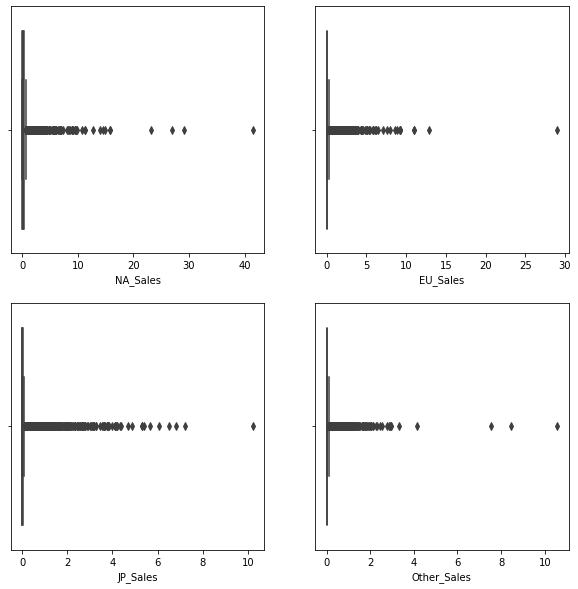

In [37]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
sns.boxplot(df.NA_Sales, ax=ax[0,0])
sns.boxplot(df.EU_Sales, ax=ax[0,1])
sns.boxplot(df.JP_Sales, ax=ax[1,0])
sns.boxplot(df.Other_Sales, ax=ax[1,1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

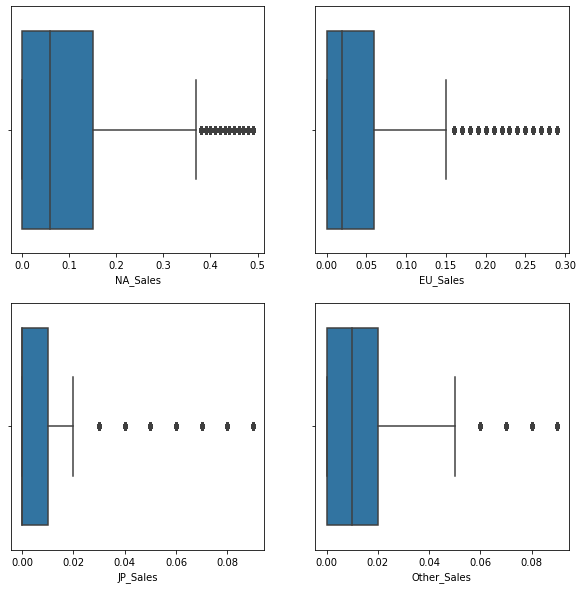

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
sns.boxplot(df.loc[df.NA_Sales < 0.5, 'NA_Sales'], ax=ax[0,0])
sns.boxplot(df.loc[df.EU_Sales < 0.3, 'EU_Sales'], ax=ax[0,1])
sns.boxplot(df.loc[df.JP_Sales < 0.1, 'JP_Sales'], ax=ax[1,0])
sns.boxplot(df.loc[df.Other_Sales < 0.1, 'Other_Sales'], ax=ax[1,1])

#### 중복값 제거

In [39]:
# 전제 중복값
df[df.duplicated()] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [40]:
# 이름과 플랫폼이 겹치는 경우
df[df.duplicated(['Name', 'Platform'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1292,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15
2606,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05
7159,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.00,0.22
8497,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00
12203,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13444,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02


- 이름이 "Need for Speed: Most Wanted"인 게임의 플랫폼이 X360, PC인 경우 중복값이 존재하면서 값이 서로 다름 -> 모두 삭제
- "Madden NFL 13"도 중복된 값이 존재하면서 Sales의 값이 다름 -> 모두 삭제

In [41]:
duplicate_index = df[df.duplicated(['Name', 'Platform'], keep=False)].index

df = df.drop(duplicate_index).reset_index(drop=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16146 non-null  object 
 1   Platform     16146 non-null  object 
 2   Year         16146 non-null  int64  
 3   Genre        16146 non-null  object 
 4   Publisher    16146 non-null  object 
 5   NA_Sales     16146 non-null  float64
 6   EU_Sales     16146 non-null  float64
 7   JP_Sales     16146 non-null  float64
 8   Other_Sales  16146 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


#### feature engineering

In [43]:
# 전체 판매량 컬럼을 하나 만들어줌
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [44]:
# # 10년 단위로 끊어서 새로운 컬럼에 담기
df['decade'] = pd.cut(df.Year,np.arange(1980, 2026, 5),labels=['1980년대 초반', '1980년대 후반', '1990년대 초반', '1990년대 후반', '2000년대 초반', '2000년대 후반', '2010년대 초반', '2010년대 후반', '2020년대'], right=False)

In [45]:
# Year의 타입을 object로 변경
df = df.astype({'Year':'str'})

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16146 non-null  object  
 1   Platform      16146 non-null  object  
 2   Year          16146 non-null  object  
 3   Genre         16146 non-null  object  
 4   Publisher     16146 non-null  object  
 5   NA_Sales      16146 non-null  float64 
 6   EU_Sales      16146 non-null  float64 
 7   JP_Sales      16146 non-null  float64 
 8   Other_Sales   16146 non-null  float64 
 9   Global_Sales  16146 non-null  float64 
 10  decade        16146 non-null  category
dtypes: category(1), float64(5), object(5)
memory usage: 1.2+ MB


## 시각화

In [47]:
plt.rc('font', family='NanumBarunGothic') 

In [48]:
print("게임 종류: ", df.Name.nunique())
print("게임 장르: ", df.Genre.nunique())
print("게임 플랫폼: ", df.Platform.nunique())
print("게임 회사: ", df.Publisher.nunique())

게임 종류:  11199
게임 장르:  12
게임 플랫폼:  31
게임 회사:  573


#### 특성별 판매량


In [49]:
publisher_df = df.groupby('Publisher').sum().reset_index()
genre_df = df.groupby('Genre').sum().reset_index()
platform_df = df.groupby('Platform').sum().reset_index()

In [50]:
# df.groupby('Platform').count()

Text(0.5, 1.0, '글로벌 판매량 상위 10개 게임 배급 회사(전체)')

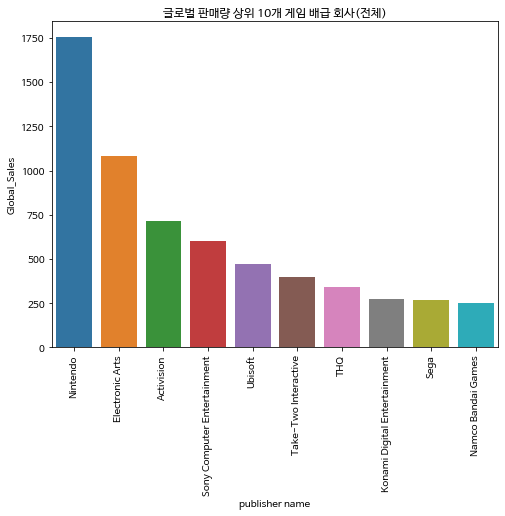

In [51]:
# 게임 배급 회사별(전체)
plt.figure(figsize=(8, 6))
sns.barplot(data=publisher_df.sort_values(by='Global_Sales', ascending=False).head(10), x='Publisher', y='Global_Sales');
plt.xticks(rotation=90);
plt.xlabel("publisher name")

plt.title("글로벌 판매량 상위 10개 게임 배급 회사(전체)")

Text(0.5, 1.0, '글로벌 판매량 플랫폼(전체)')

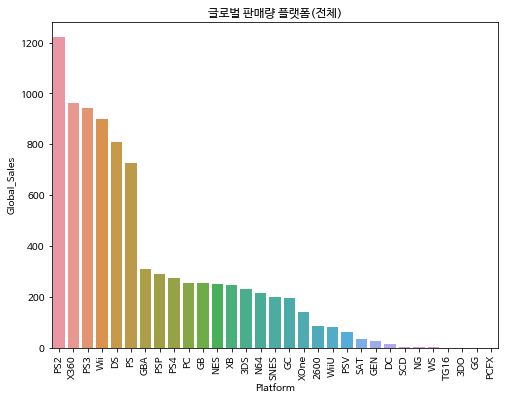

In [52]:
# 플랫폼
plt.figure(figsize=(8, 6))
sns.barplot(data=platform_df.sort_values(by='Global_Sales', ascending=False), x='Platform', y='Global_Sales');
plt.xticks(rotation=90);

plt.title("글로벌 판매량 플랫폼(전체)")

플랫폼 순위 PS2 > X360 > PS3 > Wii > DS 순

Text(0.5, 1.0, '글로벌 판매량 상위 10개 플랫폼(전체)')

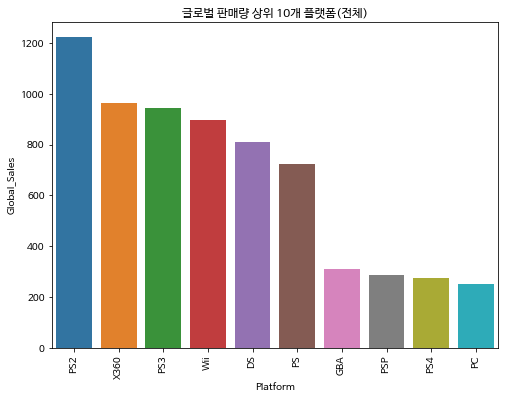

In [53]:
# 플랫폼 별
plt.figure(figsize=(8, 6))
sns.barplot(data=platform_df.sort_values(by='Global_Sales', ascending=False).head(10), x='Platform', y='Global_Sales');
plt.xticks(rotation=90);

plt.title("글로벌 판매량 상위 10개 플랫폼(전체)")

Text(0.5, 1.0, '판매량 상위 10개 플랫폼 판매량 비율')

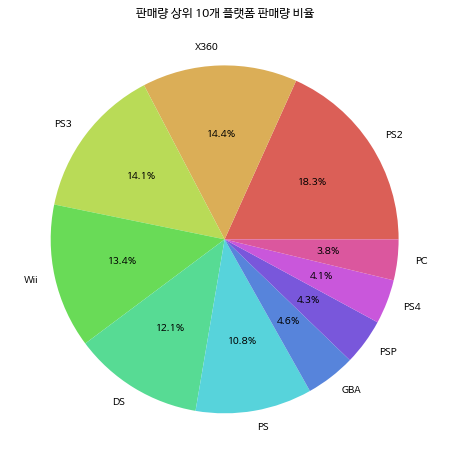

In [54]:
ratio = df.groupby('Platform').sum().reset_index().sort_values(by='Global_Sales', ascending=False).head(10).Global_Sales
labels = df.groupby('Platform').sum().reset_index().sort_values(by='Global_Sales', ascending=False).head(10).Platform

# 상위 10개 플랫폼 판매 비율
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성
plt.figure(figsize=(10, 8))
plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors);
plt.title("판매량 상위 10개 플랫폼 판매량 비율")

Text(0.5, 1.0, '장르별 글로벌 판매량 순위(전체)')

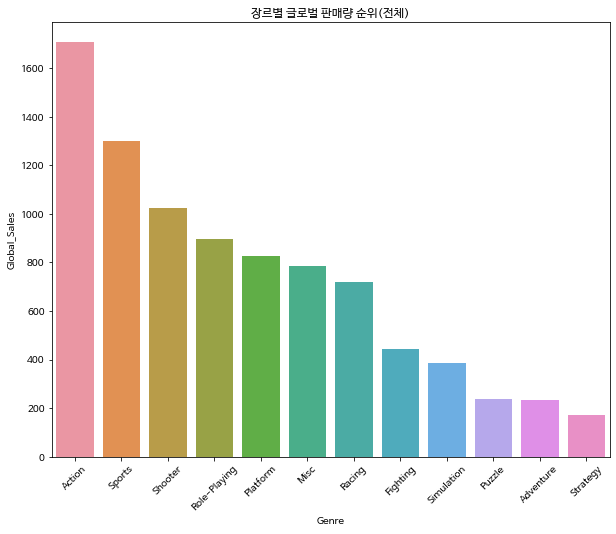

In [55]:
# 장르별 판매량
plt.figure(figsize=(10, 8))
sns.barplot(data=genre_df.sort_values(by='Global_Sales', ascending=False), x='Genre', y='Global_Sales');
plt.xticks(rotation=45);

plt.title("장르별 글로벌 판매량 순위(전체)")

In [56]:
ratio = df.groupby('Genre').sum().reset_index().sort_values(by='Global_Sales').Global_Sales
labels = df.groupby('Genre').sum().reset_index().sort_values(by='Global_Sales').Genre

Text(0.5, 1.0, '장르별 게임 판매량 비율')

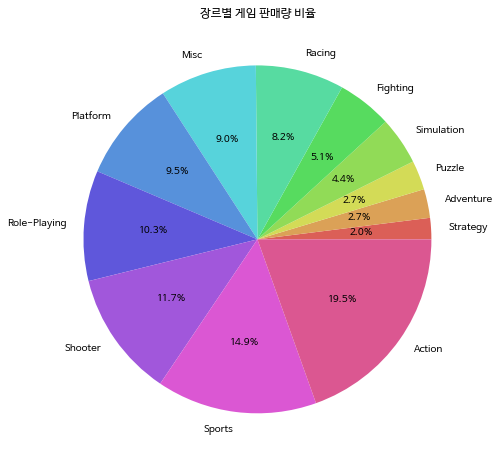

In [57]:
# 장르별 판매비율
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성
plt.figure(figsize=(10, 8))
plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors);
plt.title("장르별 게임 판매량 비율")

모든 지역의 판매량을 장르 별로 출력했을 때, Action > Sports > Shooter > Role-Playing > Platform 순

#### 지역별
- 지역은 어떻게 구분했나요?
- 지역 별로 선호하는 게임의 장르를 파악했나요?
- 지역 별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?


In [58]:
genre_df = df.groupby(['Genre']).agg('sum').reset_index()
genre_df

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,854.27,513.15,154.97,183.85,1706.24
1,Adventure,101.88,63.50,51.64,16.66,233.68
2,Fighting,221.61,100.92,86.00,36.55,445.08
3,Misc,399.91,210.20,103.59,72.73,786.43
4,Platform,443.78,200.38,130.26,51.43,825.85
5,Puzzle,120.99,49.78,55.18,12.39,238.34
6,Racing,352.37,234.22,56.22,76.34,719.15
7,Role-Playing,316.57,182.50,340.01,56.62,895.70
8,Shooter,573.54,309.54,37.92,101.65,1022.65
9,Simulation,180.01,113.08,62.98,31.30,387.37


Text(0.5, 1.0, '북미지역 장르별 판매 비율')

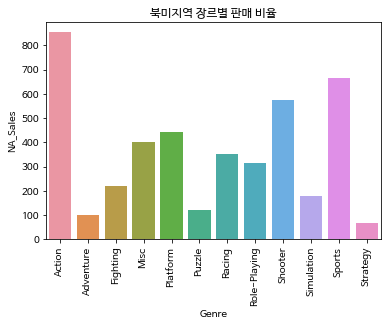

In [59]:
sns.barplot(data=genre_df, x='Genre', y='NA_Sales')
plt.xticks(rotation=90)
# (df.groupby('Genre').sum()['NA_Sales'] / df.NA_Sales.sum()).plot.bar()
plt.title("북미지역 장르별 판매 비율")

Text(0.5, 1.0, '유럽지역 장르별 판매 비율')

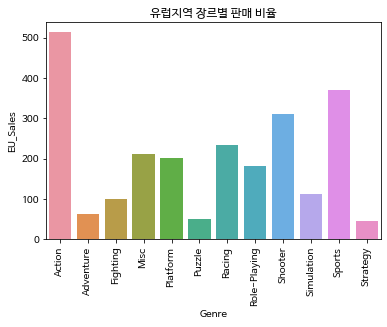

In [60]:
sns.barplot(data=genre_df, x='Genre', y='EU_Sales')
plt.xticks(rotation=90)
plt.title("유럽지역 장르별 판매 비율")


Text(0.5, 1.0, '일본지역 장르별 판매 비율')

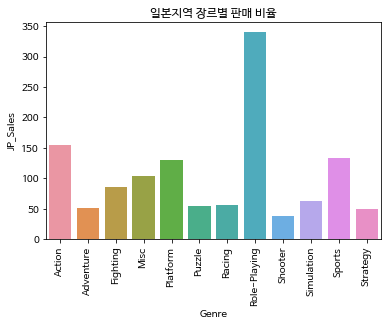

In [61]:
sns.barplot(data=genre_df, x='Genre', y='JP_Sales')
plt.xticks(rotation=90)
plt.title("일본지역 장르별 판매 비율")

Text(0.5, 1.0, '기타지역 장르별 판매 비율')

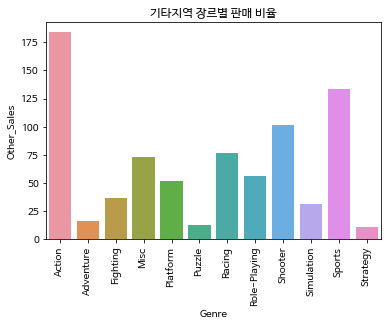

In [62]:
sns.barplot(data=genre_df, x='Genre', y='Other_Sales')
plt.xticks(rotation=90)
plt.title("기타지역 장르별 판매 비율")

북미, 유럽, 기타 지역의 경우 전체 판매량에서 action 장르의 판매량이 차지하는 비율이 가장 높고, 일본의 경우 Role-Playing 장르가 차지하는 비율이 가장 높다.

#### 지역별 판매량이 글로벌 판매량에 미치는 영향

In [63]:
sales = ['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales']

In [64]:
ratio = []
for i in sales:
  ratio.append(df[i].sum() / df['Global_Sales'].sum())

labels = ['북미', '유럽', '일본', '기타']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

Text(0.5, 1.0, '글로벌 시장에서 지역 별 판매 바율')

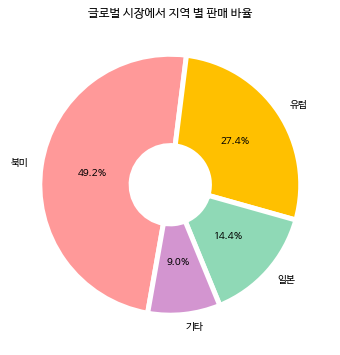

In [65]:
plt.figure(figsize=(8, 6))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5});
plt.title("글로벌 시장에서 지역 별 판매 바율")

In [66]:
# for c in sales:
#   plt.bar(c, df[c].sum() / df['Global_Sales'].sum())

# plt.title("글로벌 판매량에서 지역 별 판매 비율")

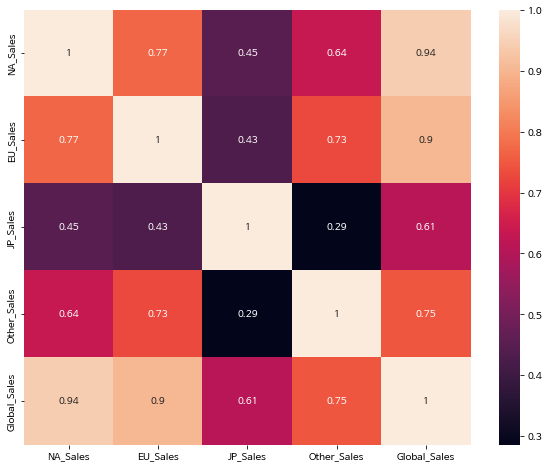

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

- 글로벌 시장에서 지역별 게임 판매 비율 순위: 북미 > 유럽 > 일본 > 기타
- 글로벌 판매 순위와 지역별 판매 순위의 상관관계를 시각화해본 결과 북미 > 유럽 > 기타 > 일본

=> 시장의 크기는 일본이 기타보다 더 높은데 상관관계가 낮다는 건 일본 안에서 유독 더 인기있는 게임이 존재한다는 것?

#### 연도별
- 연도별 게임의 트렌드가 있을까?
  - 트렌드는 어떤 것을 기준으로 파악했나요?
  - 연도 별로 트렌드가 존재하나요?
  - 왜 존재한다/존재하지 않는다고 생각했나요?

연도별 트렌드를 알아보기 위해 5년을 단위로 연도를 카테고리화해서 시각화(1980년대초반 ~ 2020년대)

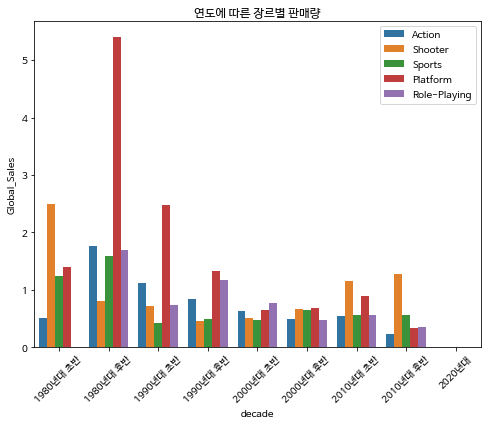

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(x='decade', y='Global_Sales', data=df.query("Genre in ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']").sort_values(by='Year'), hue='Genre',ci=None)
plt.title("연도에 따른 장르별 판매량")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

5년을 단위로 장르별 판매량을 시각화했을 때, 시기마다 인기있는 장르가 다르다는 것을 알 수 있음

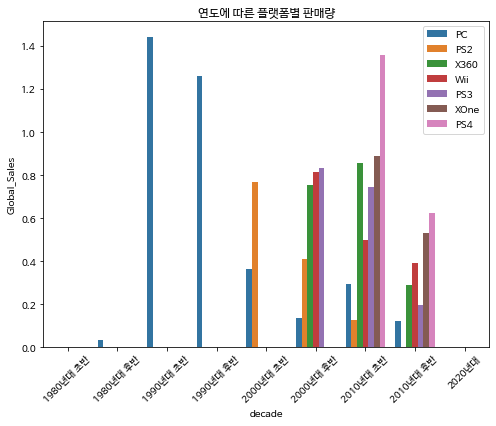

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(x='decade', y='Global_Sales', data=df.query("Platform in ['PS2', 'X360', 'PS3','Wii', 'PS4', 'XOne', 'PC']").sort_values(by='Year'), hue='Platform',ci=None)
plt.title("연도에 따른 플랫폼별 판매량")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

플랫폼의 경우 최근에는 PS4와 XOne 부분이 높은 판매량을 보이고 있음

#### 인기 많은 게임

In [70]:
platform = list(df.sort_values(by='Global_Sales', ascending=False).head(10).Platform)

Text(0.5, 1.0, '글로벌 판매량 상위 10개 게임(전체)')

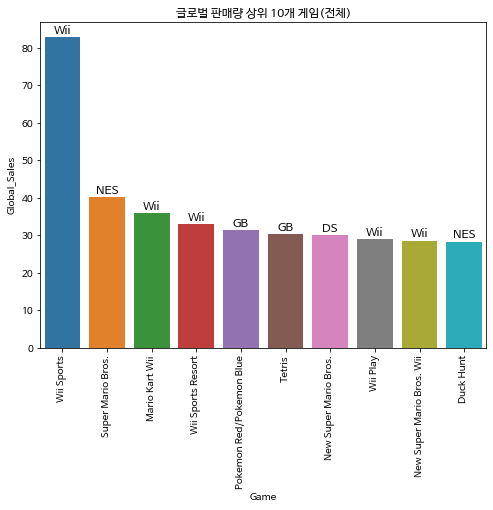

In [71]:
# 판매량 상위 10개 게임
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df.sort_values(by='Global_Sales', ascending=False).head(10), x='Name', y='Global_Sales');

for i, p in enumerate(ax.patches):
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height+ 1, platform[i], hA='center', size = 12)
plt.xticks(rotation=90);
plt.xlabel("Game")

plt.title("글로벌 판매량 상위 10개 게임(전체)")

Text(0.5, 1.0, '글로벌 판매량 상위 10개 게임 보급 회사(전체)')

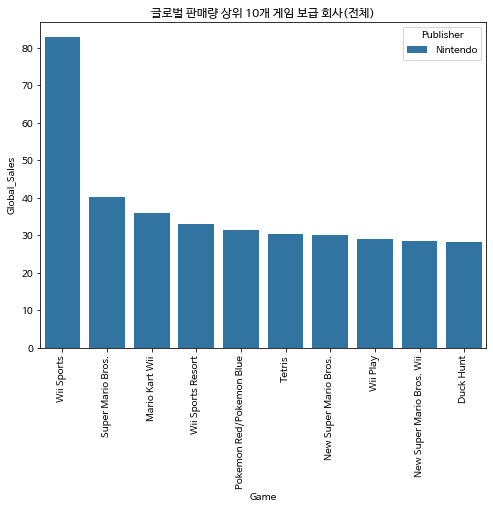

In [72]:
# 판매량 상위 10개 게임의 publisher
plt.figure(figsize=(8, 6))
sns.barplot(data=df.sort_values(by='Global_Sales', ascending=False).head(10), x='Name', y='Global_Sales', hue='Publisher');
plt.xticks(rotation=90);
plt.xlabel("Game")

plt.title("글로벌 판매량 상위 10개 게임 보급 회사(전체)")

실제 글로벌 판매 상위 10개의 보급 회사는 모두 닌텐도로, 보급 회사 별 판매량도 시각화 했을 때, 닌텐도가 1위

Text(0.5, 1.0, '글로벌 판매량 상위 10개 게임의 platform')

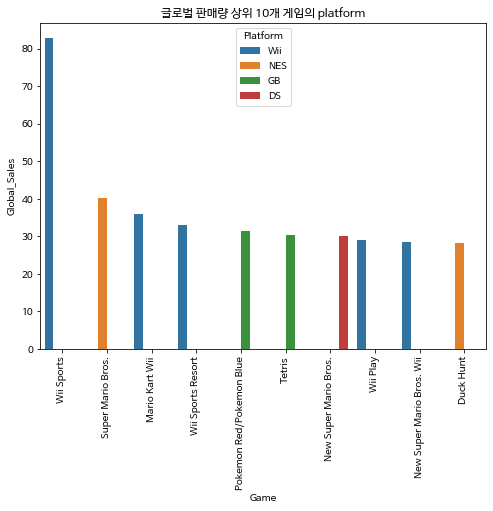

In [73]:
# 판매량 상위 10개 게임
plt.figure(figsize=(8, 6))
sns.barplot(data=df.sort_values(by='Global_Sales', ascending=False).head(10), x='Name', y='Global_Sales', hue='Platform');
plt.xticks(rotation=90);
plt.xlabel("Game")

plt.title("글로벌 판매량 상위 10개 게임의 platform")

글로벌 판매량의 플랫폼 별 판매량 순위를 보면 PS2, X360, PS3, Wii, DS 등의 순으로 나타나는데, 게임 별 글로벌 판매량에서 상위 10개 안에는 Wii, DS를 제외하고 포함되있지 않음 
- 해당 플랫폼을 지원하는 게임의 수가 많다?
- 해당 플랫폼을 지원하는 게임의 판매량이 한곳으로 쏠리지 않고 잘 분포되어있다?
  - 만약 맞다면 해당 플랫폼을 지원하는 게임을 배포하는 것이 유리

In [74]:
df.groupby('Platform').count().reset_index().sort_values(by='Name', ascending=False).head()

,Platform,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
16,PS2,2092,2092,2092,2092,2092,2092,2092,2092,2092,2092
4,DS,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082
17,PS3,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296
26,Wii,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276
28,X360,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224


Text(0.5, 1.0, '각 플랫폼을 지원하는 게임의 수')

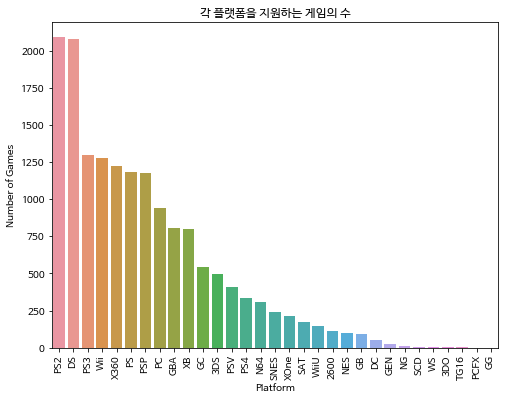

In [75]:
# 각 플랫폼을 지원하는 게임의 수
plt.figure(figsize=(8, 6))
sns.barplot(data=df.groupby('Platform').count().reset_index().sort_values(by='Name', ascending=False), x='Platform', y='Name')
plt.xticks(rotation=90)
plt.ylabel("Number of Games")
plt.title("각 플랫폼을 지원하는 게임의 수")

Text(0.5, 1.0, '각 플랫폼을 지원하는 게임의 평균 판매량')

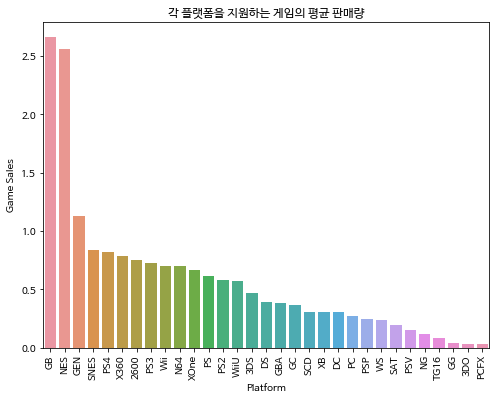

In [76]:
# 각 플랫폼을 지원하는 게임의 수
plt.figure(figsize=(8, 6))
sns.barplot(data=df.groupby('Platform').mean().reset_index().sort_values(by='Global_Sales', ascending=False), x='Platform', y='Global_Sales')
plt.xticks(rotation=90)
plt.ylabel("Game Sales")
plt.title("각 플랫폼을 지원하는 게임의 평균 판매량")

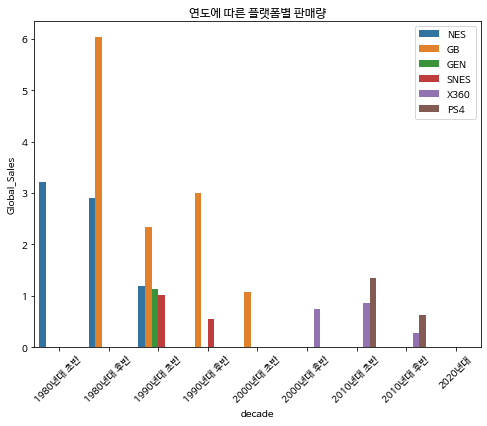

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='decade', y='Global_Sales', data=df.query("Platform in ['GB', 'NES', 'GEN','SNES', 'PS4', 'X360']").sort_values(by='Year'), hue='Platform',ci=None)
plt.title("연도에 따른 플랫폼별 판매량")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

#### 다음 분기에 어떤 게임을 설계할까

In [78]:
year_df = df.groupby('Year').sum().reset_index()

year_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,10.13,0.64,0.00,0.11,10.88
1,1981,33.40,1.96,0.00,0.32,35.68
2,1982,26.92,1.65,0.00,0.31,28.88
3,1983,7.76,0.80,8.10,0.14,16.80
4,1984,33.28,2.10,14.27,0.70,50.35


Text(0.5, 1.0, '연도별 총 판매량')

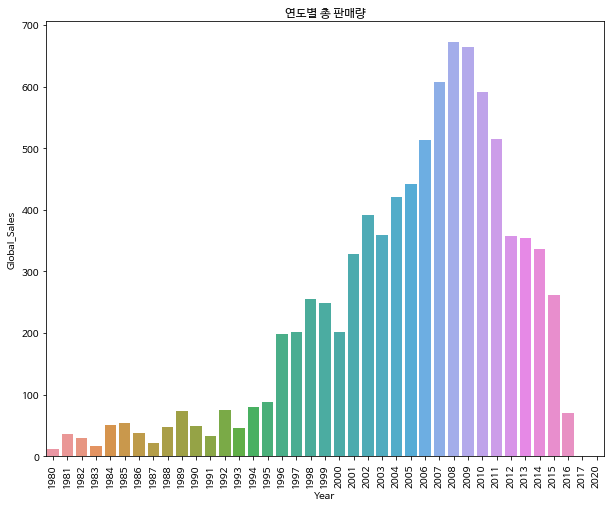

In [79]:
plt.figure(figsize=(10, 8))
sns.barplot(data=year_df, x='Year', y='Global_Sales')
plt.xticks(rotation=90)
plt.title("연도별 총 판매량")

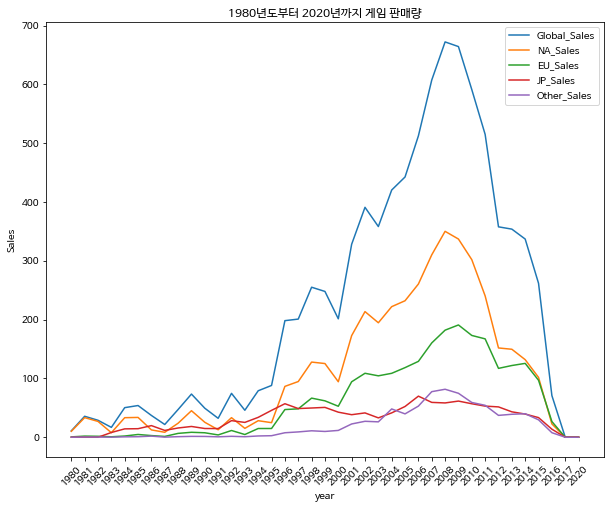

In [80]:
plt.figure(figsize=(10, 8))
plt.plot(year_df['Year'], year_df['Global_Sales'],label='Global_Sales' )
plt.plot(year_df['Year'], year_df['NA_Sales'],label='NA_Sales')
plt.plot(year_df['Year'], year_df['EU_Sales'],label='EU_Sales')
plt.plot(year_df['Year'], year_df['JP_Sales'],label='JP_Sales')
plt.plot(year_df['Year'], year_df['Other_Sales'],label='Other_Sales')

plt.xticks(rotation=45)
plt.xlabel("year")
plt.ylabel("Sales")
plt.legend(fontsize=10)
plt.title("1980년도부터 2020년까지 게임 판매량")
plt.show()

판매량을 보면 계속 증가하다가 2010년도쯤 정상을 찍고 다시 하락하는 모습을 보이고 있음. 여기서 유의미한 결과를 얻기 위해 게임 판매량이 감소하기 시작하는 2012년부터 현재까지의 데이터의 자료만 시각화해보면 좋을 것 같음

In [81]:
from2012_to2020 = df[(df.Year > "2011")]

from2012_to2020.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03,2010년대 초반
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05,2010년대 후반
23,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01,2010년대 초반
24,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25,2010년대 초반
32,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,2010년대 후반


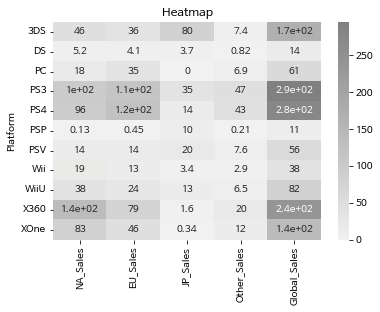

In [82]:
sns.heatmap(from2012_to2020.groupby('Platform').sum(), cmap=sns.light_palette("gray", as_cmap=True), annot=True)
plt.title("Heatmap")
plt.show()

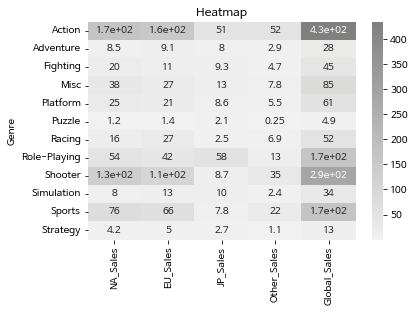

In [83]:
sns.heatmap(from2012_to2020.groupby('Genre').sum(), cmap=sns.light_palette("gray", as_cmap=True), annot=True)
plt.title("Heatmap")
plt.show()

**나라별 판매량**

Text(0.5, 1.0, '북미 지역 최근 판매량(2012년~2020년)')

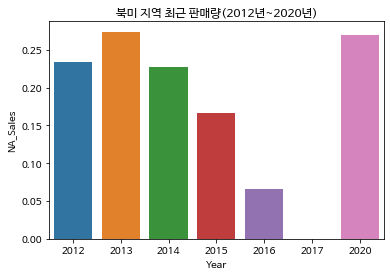

In [84]:
sns.barplot(data=from2012_to2020.sort_values(by='Year'), x='Year', y='NA_Sales', ci=None)

plt.title("북미 지역 최근 판매량(2012년~2020년)")

Text(0.5, 1.0, '유럽 지역 최근 판매량(2012년~2020년)')

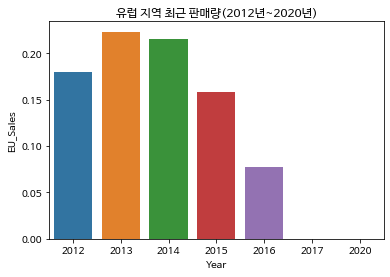

In [85]:
sns.barplot(data=from2012_to2020.sort_values(by='Year'), x='Year', y='EU_Sales', ci=None)

plt.title("유럽 지역 최근 판매량(2012년~2020년)")

Text(0.5, 1.0, '일본 지역 최근 판매량(2012년~2020년)')

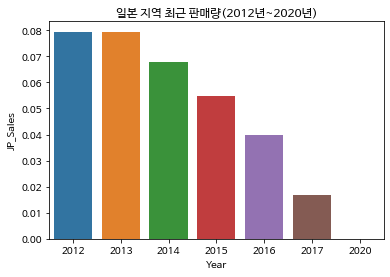

In [86]:
sns.barplot(data=from2012_to2020.sort_values(by='Year'), x='Year', y='JP_Sales', ci=None)

plt.title("일본 지역 최근 판매량(2012년~2020년)")

Text(0.5, 1.0, '기타 지역 최근 판매량(2012년~2020년)')

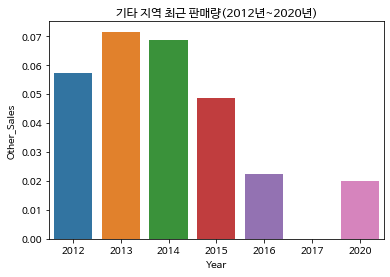

In [87]:
sns.barplot(data=from2012_to2020.sort_values(by='Year'), x='Year', y='Other_Sales', ci=None)

plt.title("기타 지역 최근 판매량(2012년~2020년)")

**장르별 판매량**

Text(0.5, 1.0, '장르별 판매량')

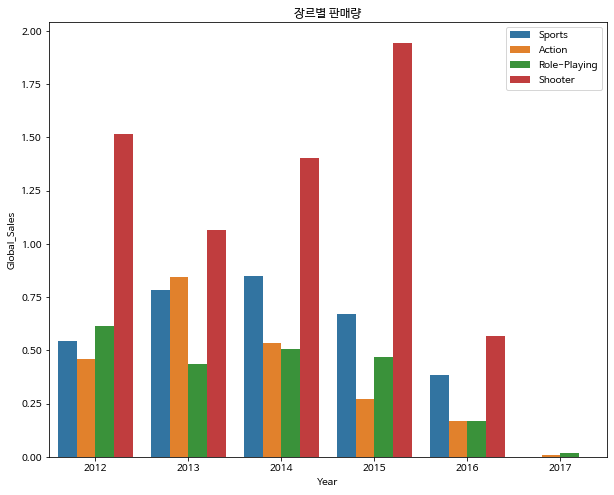

In [88]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Genre in ['Action', 'Sports', 'Role-Playing', 'Shooter']"), x='Year',y='Global_Sales', hue='Genre', ci=None)
plt.legend(loc='upper right')
plt.title("장르별 판매량")

Text(0.5, 1.0, '장르별 판매량(북미)')

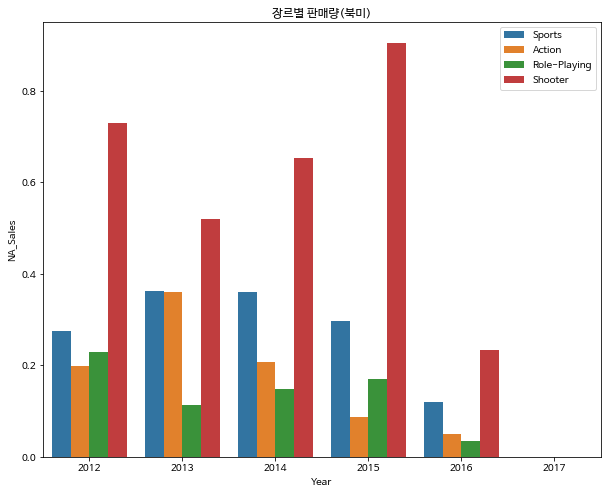

In [89]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Genre in ['Action', 'Sports', 'Role-Playing', 'Shooter']"), x='Year',y='NA_Sales', hue='Genre', ci=None)
plt.legend(loc='upper right')
plt.title("장르별 판매량(북미)")

Text(0.5, 1.0, '장르별 판매량(유럽)')

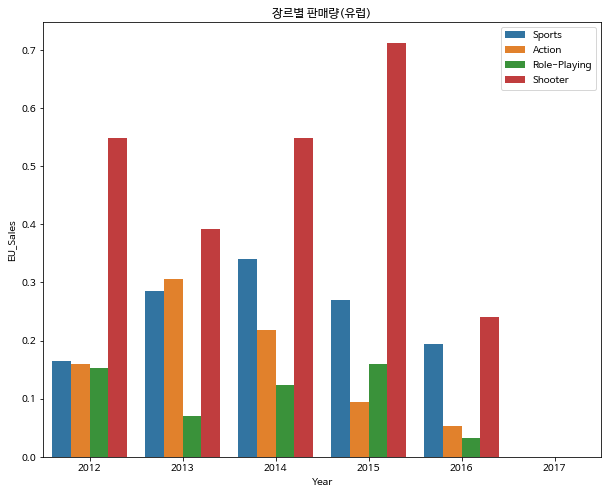

In [90]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Genre in ['Action', 'Sports', 'Role-Playing', 'Shooter']"), x='Year',y='EU_Sales', hue='Genre', ci=None)
plt.legend(loc='upper right')
plt.title("장르별 판매량(유럽)")

Text(0.5, 1.0, '장르별 판매량(기타)')

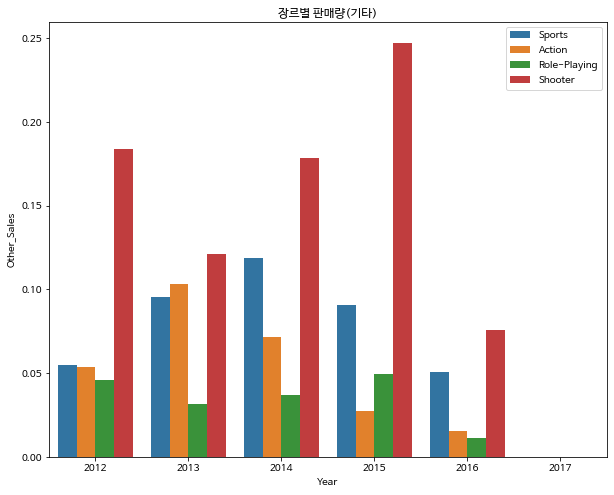

In [91]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Genre in ['Action', 'Sports', 'Role-Playing', 'Shooter']"), x='Year',y='Other_Sales', hue='Genre', ci=None)
plt.legend(loc='upper right')
plt.title("장르별 판매량(기타)")

Text(0.5, 1.0, '장르별 판매량(일본)')

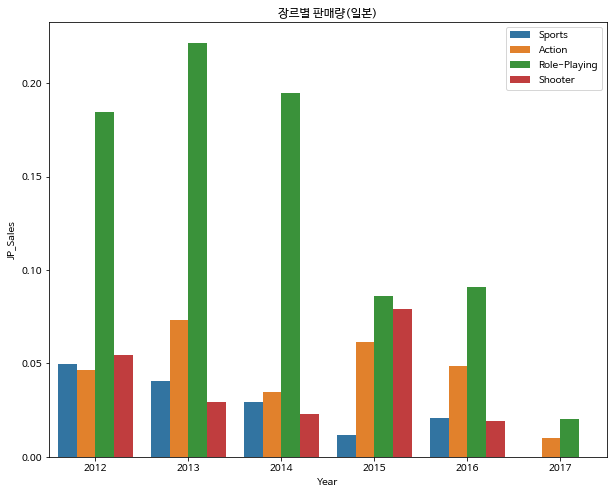

In [92]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Genre in ['Action', 'Sports', 'Role-Playing', 'Shooter']"), x='Year',y='JP_Sales', hue='Genre', ci=None)
plt.legend(loc='upper right')
plt.title("장르별 판매량(일본)")

<결론>
- 전세계 시장의 경우 Shooter와 Sports 부분의 게임을 배급하는 것이 유리
- 일본 시장을 타겟팅할 경우, Role-Playing 게임을 배급하는 것이 유리

**플랫폼별**

Text(0.5, 1.0, '플랫폼별 판매량')

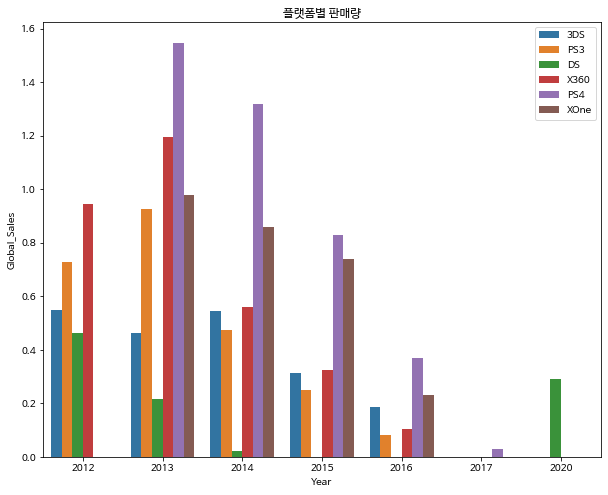

In [93]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Platform in ['X360', 'PS3','3DS', 'PS4', 'XOne', 'DS']"), x='Year',y='Global_Sales', hue='Platform', ci=None)
plt.legend(loc='upper right')
plt.title("플랫폼별 판매량")

Text(0.5, 1.0, '플랫폼별 판매량(북미)')

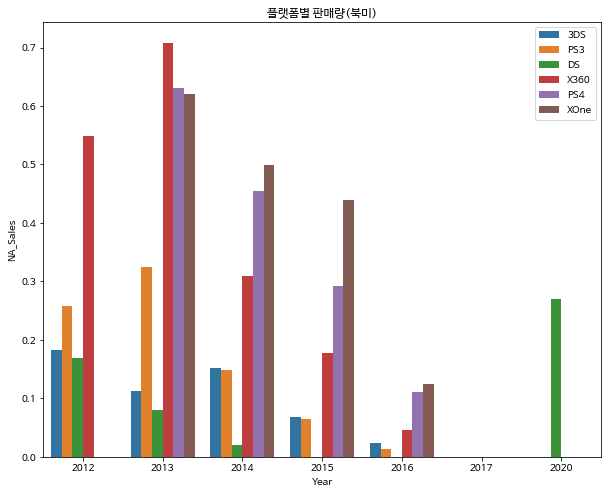

In [94]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Platform in ['X360', 'PS3','3DS', 'PS4', 'XOne', 'DS']"), x='Year',y='NA_Sales', hue='Platform', ci=None)
plt.legend(loc='upper right')
plt.title("플랫폼별 판매량(북미)")

Text(0.5, 1.0, '플랫폼별 판매량(유럽)')

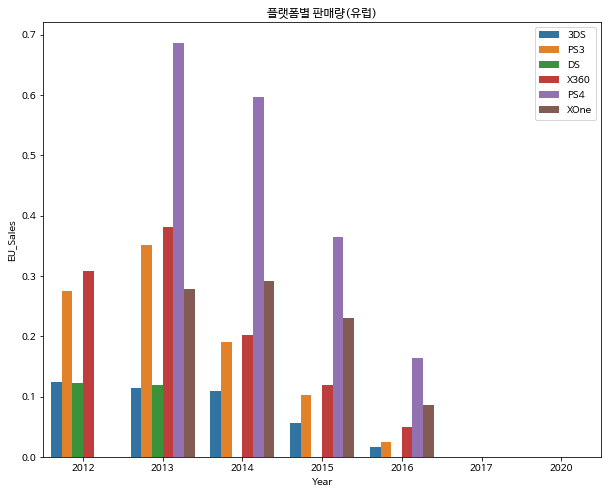

In [95]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Platform in ['X360', 'PS3','3DS', 'PS4', 'XOne', 'DS']"), x='Year',y='EU_Sales', hue='Platform', ci=None)
plt.legend(loc='upper right')
plt.title("플랫폼별 판매량(유럽)")

Text(0.5, 1.0, '플랫폼별 판매량(일본)')

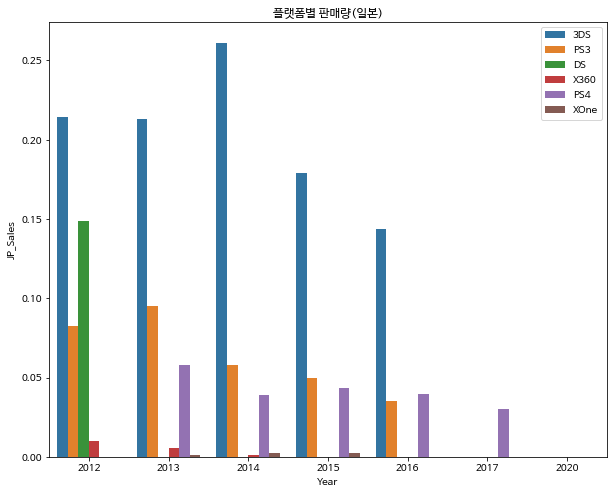

In [96]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Platform in ['X360', 'PS3','3DS', 'PS4', 'XOne', 'DS']"), x='Year',y='JP_Sales', hue='Platform', ci=None)
plt.legend(loc='upper right')
plt.title("플랫폼별 판매량(일본)")

Text(0.5, 1.0, '플랫폼별 판매량(기타)')

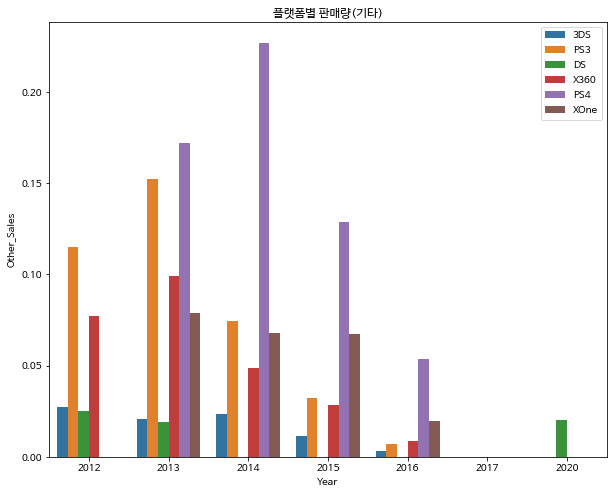

In [97]:
plt.figure(figsize=(10, 8))
sns.barplot(data=from2012_to2020.sort_values(by='Year').query("Platform in ['X360', 'PS3','3DS', 'PS4', 'XOne', 'DS']"), x='Year',y='Other_Sales', hue='Platform', ci=None)
plt.legend(loc='upper right')
plt.title("플랫폼별 판매량(기타)")

<결론>
- 대부분 모든 지역에서 PS4와 XOne의 판매율이 높은 편
- 북미와 기타 지역의 경우 2020년 DS의 판매 비율이 증가
- 일본을 타겟팅할 경우 3DS를 지원하는 게임을 배급하는 것도 생각해볼만

In [98]:
from2012_to2020.Platform.unique()

array(['PS3', 'PS4', 'X360', '3DS', 'XOne', 'PSP', 'PC', 'WiiU', 'PSV',
       'DS', 'Wii'], dtype=object)

**shooter와 sports게임을 지원하는 플랫폼의 수**

Text(0.5, 1.0, '슈팅게임과 스포츠 게임을 지원하는 플랫폼의 수')

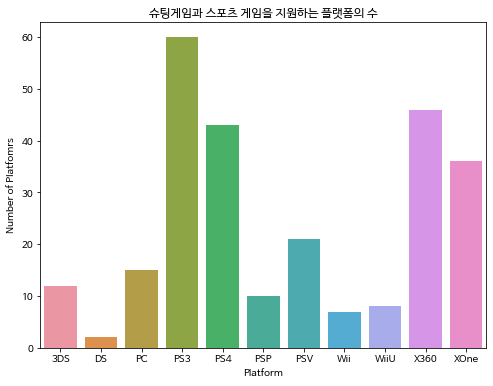

In [99]:
plt.figure(figsize=(8, 6))

sns.barplot(data=from2012_to2020.query("Genre in ['Shooters', 'Sports']").groupby('Platform').count().reset_index(), x='Platform', y='Name')
plt.ylabel("Number of Platfomrs")
plt.title("슈팅게임과 스포츠 게임을 지원하는 플랫폼의 수")

## 2020년대 게임 판매량(진행중)

데이터 출처: https://www.kaggle.com/datasets/baynebrannen/video-game-sales-2020

In [ ]:
# # 데이터 불러오기
# cols = ['title', 'console', 'genre', 'publisher', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_date']
# df_2020 = pd.read_csv("/content/vgchartz-7_7_2020.csv", usecols=cols)
# df_2020.head()

,title,console,genre,publisher,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Warriors,Series,Action,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,God of War,Series,Action,Sony Computer Entertainment,NaN,NaN,NaN,NaN,NaN,2005-03-22
2,Devil May Cry,Series,Action,Capcom,NaN,NaN,NaN,NaN,NaN,2001-10-16
3,Grand Theft Auto V,PS3,Action,Rockstar Games,20.32,6.37,0.99,9.85,3.12,2013-09-17
4,Frogger,Series,Action,Konami,NaN,NaN,NaN,NaN,NaN,1981-10-23


In [ ]:
# df_2020.isna().sum()

title               0
console             0
genre               0
publisher           0
total_sales     38631
na_sales        45050
jp_sales        50957
pal_sales       44839
other_sales     42510
release_date     3654
dtype: int64

In [ ]:
# # 결측치 채우기(total = na + jp + pal + other)
# other_nan = df_2020[~(df_2020.total_sales.isna()) & (df_2020.other_sales.isna()) & ~(df_2020.na_sales.isna()) & ~(df_2020.jp_sales.isna()) & ~(df_2020.pal_sales.isna())].index
# df_2020.loc[other_nan, 'other_sales'] = df_2020.loc[other_nan, 'total_sales'] - df_2020.loc[other_nan, 'na_sales'] - df_2020.loc[other_nan, 'jp_sales'] - df_2020.loc[other_nan, 'pal_sales']

# na_nan = df_2020[~(df_2020.total_sales.isna()) & ~(df_2020.other_sales.isna()) & (df_2020.na_sales.isna()) & ~(df_2020.jp_sales.isna()) & ~(df_2020.pal_sales.isna())].index
# df_2020.loc[na_nan, 'na_sales'] = df_2020.loc[na_nan, 'total_sales'] - df_2020.loc[na_nan, 'jp_sales'] - df_2020.loc[na_nan, 'pal_sales'] - df_2020.loc[na_nan, 'other_sales']

# jp_nan = df_2020[~(df_2020.total_sales.isna()) & ~(df_2020.other_sales.isna()) & ~(df_2020.na_sales.isna()) & (df_2020.jp_sales.isna()) & ~(df_2020.pal_sales.isna())].index
# df_2020.loc[jp_nan, 'jp_sales'] = df_2020.loc[jp_nan, 'total_sales'] - df_2020.loc[jp_nan, 'na_sales'] - df_2020.loc[jp_nan, 'pal_sales'] - df_2020.loc[jp_nan, 'other_sales']

# pal_nan = df_2020[~(df_2020.total_sales.isna()) & ~(df_2020.other_sales.isna()) & ~(df_2020.na_sales.isna()) & ~(df_2020.jp_sales.isna()) & (df_2020.pal_sales.isna())].index
# df_2020.loc[pal_nan, 'pal_sales'] = df_2020.loc[pal_nan, 'total_sales'] - df_2020.loc[pal_nan, 'na_sales'] - df_2020.loc[pal_nan, 'jp_sales'] - df_2020.loc[pal_nan, 'other_sales']

In [ ]:
# # 결측치 제거
# df_2020 = df_2020.dropna().reset_index(drop=True)

# df_2020.isna().sum()

title           0
console         0
genre           0
publisher       0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64

In [ ]:
# df_2020['year'] = df_2020.release_date.str.split("-").str[0]

# df_2020 = df_2020.drop(columns='release_date', axis=1)

In [ ]:
# df_2020[df_2020.year=='2020']

,title,console,genre,publisher,total_sales,na_sales,jp_sales,pal_sales,other_sales,year


In [ ]:
# # 기존 데이터와 동일한 장르만 남기기
# drop_genre_index = df_2020[~df_2020.genre.isin(df.Genre.unique())].index

# df_2020 = df_2020.drop(drop_genre_index).reset_index(drop=True)

In [ ]:
# # 기존 데이터와 동일한 플랫폼만 남기기
# drop_platform_index = df_2020[~df_2020.console.isin(df.Platform.unique())].index

# df_2020 = df_2020.drop(drop_platform_index).reset_index(drop=True)

기존 데이터와 비교했을 때, 같은 title인 경우 동일한 판매량을 보이는 걸 알 수 있음


In [ ]:
# df_2020[df_2020.console=='GEN']

,title,console,genre,publisher,total_sales,na_sales,jp_sales,pal_sales,other_sales,year
71,Streets of Rage,GEN,Action,Sega,2.60,1.86,1.100000e-01,0.55,0.08,1990
156,The Lion King,GEN,Action,Virgin Interactive,1.41,0.97,3.000000e-02,0.37,0.05,1994
2677,Mortal Kombat,GEN,Fighting,Arena Entertainment,2.67,1.95,-2.775558e-17,0.63,0.09,1993
2681,Mortal Kombat II (US & Others sales),GEN,Fighting,Acclaim Entertainment,2.39,1.78,6.938894e-17,0.53,0.08,1994
2722,Mortal Kombat 3,GEN,Fighting,Williams Entertainment,1.34,1.03,3.469447e-17,0.27,0.04,1995
4235,Sonic & Knuckles,GEN,Platform,Sega,1.82,1.24,3.000000e-02,0.43,0.12,1994
4240,Sonic the Hedgehog 3,GEN,Platform,Sega,1.76,1.02,2.000000e-01,0.47,0.07,1994
8895,NBA Jam,GEN,Sports,Arena Entertainment,2.05,1.75,-1.804112e-16,0.25,0.05,1993
9031,NBA Jam Tournament Edition,GEN,Sports,Acclaim Entertainment,1.11,0.95,-1.000000e-02,0.14,0.03,1995


In [ ]:
# df[df.Platform=='GEN']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
2075,Gunstar Heroes,GEN,1992,Shooter,Sega,0.00,0.00,0.13,0.00,0.13,1990년대 초반
2207,Ecco: The Tides of Time,GEN,1993,Adventure,Sega,0.00,0.00,0.07,0.00,0.07,1990년대 초반
2414,Shining Force II,GEN,1993,Strategy,Sega,0.00,0.00,0.19,0.00,0.19,1990년대 초반
2655,NBA Jam,GEN,1992,Sports,Arena Entertainment,1.75,0.25,0.00,0.05,2.05,1990년대 초반
2945,Sonic the Hedgehog 3,GEN,1994,Platform,Sega,1.02,0.47,0.20,0.07,1.76,1990년대 초반
3239,Sonic & Knuckles,GEN,1994,Platform,Sega,1.24,0.43,0.03,0.12,1.82,1990년대 초반
4786,Dynamite Headdy,GEN,1993,Platform,Sega,0.00,0.00,0.05,0.00,0.05,1990년대 초반
4901,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,4.47,1.20,0.16,0.19,6.02,1990년대 초반
5516,Streets of Rage 3,GEN,1993,Action,Sega,0.00,0.00,0.07,0.00,0.07,1990년대 초반
6243,Streets of Rage,GEN,1990,Action,Sega,1.86,0.55,0.11,0.08,2.60,1990년대 초반


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

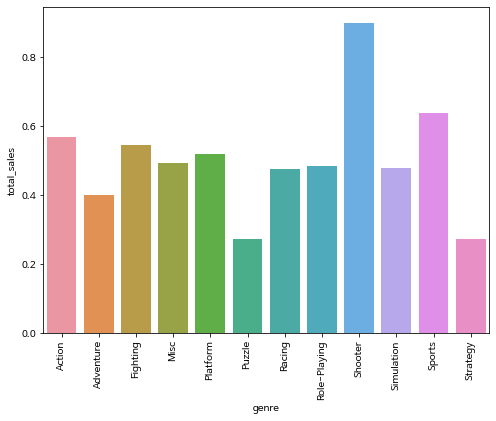

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.barplot(data=df_2020, x='genre', y='total_sales',ci=None)
# plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

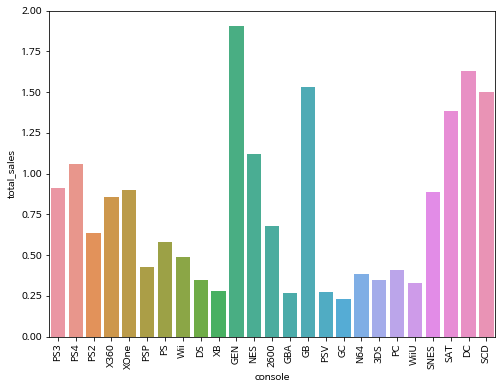

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.barplot(data=df_2020, x='console', y='total_sales',ci=None)
# plt.xticks(rotation=90)

- 내가 원했던 2020년도 게임 발매 현황과는 거리가 있는 데이터

<추가로 해보고 싶은 것>
- 기존에 주어졌던 데이터와 다른 장르, 다른 platform들이 있기에 같이 분석하면 더 좋을듯? 